In [72]:
def time_step(q, p, mass, f, dt):
    """
    q - coordinate
    p - momentum
    mass - mass
    f - force
    dt - integration time step
    """
    
    q_new = q + dt * (p/mass)
    p_new = p + f * dt
    
    return q_new, p_new

def time_step_midpoint(q, p, mass, f, dt):
    """
    q - coordinate
    p - momentum
    mass - mass
    f - force
    dt - integration time step
    """
    
    q_new = q + dt * (p/mass) + (dt**2)*(f/mass)
    p_new = p + f * dt
    
    return q_new, p_new

def time_step_verlet(q, p, mass, f, dt):
    """
    q - coordinate
    p - momentum
    mass - mass
    f - force
    dt - integration time step
    """
    
    q_new = q + dt * (p/mass) + 0.5 * ( (f/mass) * (dt**2) )
    p_new = p + f * dt
    
    return q_new, p_new

In [73]:
def energy_and_force(D, alpha, q, q0):
    """
    U = D *  ( np.exp(-2*alpha*(q-q0)) - 2*np.exp(-alpha*(q-q0) ) )
    
    F = -dU/dq = D * ( 2*alpha*np.exp(-2*alpha*(q-q0)) - 2*alpha*np.exp(-alpha*(q-q0)) )
    """
    
    energy = D *  ( np.exp(-2*alpha*(q-q0)) - 2*np.exp(-alpha*(q-q0) ) )
    #energy = D *  np.power(( 1 - np.exp(-alpha*(q-q0) ) ), 2)
    force = D * ( 2*alpha*np.exp(-2*alpha*(q-q0)) - 2*alpha*np.exp(-alpha*(q-q0)) )
    
    return energy, force


In [74]:
def md(x0, p0, q0, mass, D, alpha, dt, nsteps, method='Euler'):
    """
    x0 = starting coordinate
    p0 - starting momentum
    mass - mass of the particle
    D - controls the depth of the well
    alpha - the width of the well
    dt - integration timestep
    nsteps - how many steps we want
    """
    
    X, P, T, E_pot, E_kin, E_tot = [], [], [], [], [], []
    
    x, p = x0, p0
    
    if method=='Euler':
        integrator = time_step
    elif method=='Euler-midpoint':
        integrator = time_step_midpoint
    elif method=='Verlet':
        integrator = time_step_verlet
    for i in range(nsteps):
        X.append(x)
        P.append(p)
        T.append(i*dt)
        
        e_pot, f = energy_and_force(D, alpha, x, q0)
        
        E_pot.append(e_pot)
        e_kin = 0.5*p*p/mass
        E_kin.append(e_kin)
        
        E_tot.append(e_kin + e_pot)
        
        x, p = integrator(x, p, mass, f, dt)
        
    return X, P, T, E_pot, E_kin, E_tot             

In [75]:
import matplotlib.pyplot as plt
import numpy as np


## Part 1: Potential energy vs position

<IPython.core.display.Javascript object>


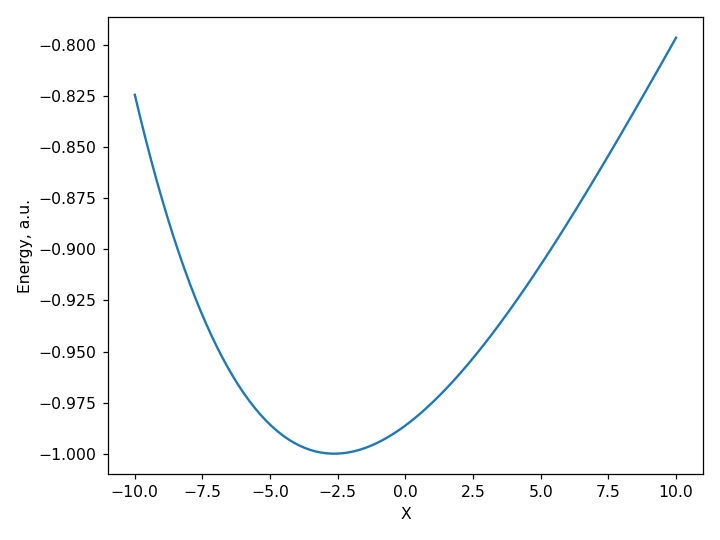

In [76]:
%matplotlib notebook
D = 1.0
alpha = 0.5
x0 = 0.6
q0 = 0.8
p0 = 0.0
M = 1.0
dt = 0.01
nsteps = 10000
# omega = np.sqrt(K/M)
x = np.linspace(-10.0, 10.0, 100)
energy, force = energy_and_force(D, alpha, q, q0)
plt.plot(x, energy)
plt.xlabel('X')
plt.ylabel('Energy, a.u.')
plt.tight_layout()
# plt.plot(x, force)
# print(force)

## Part 2: Plots of the energy conservation and phase space diagaarams for several dt values

<IPython.core.display.Javascript object>


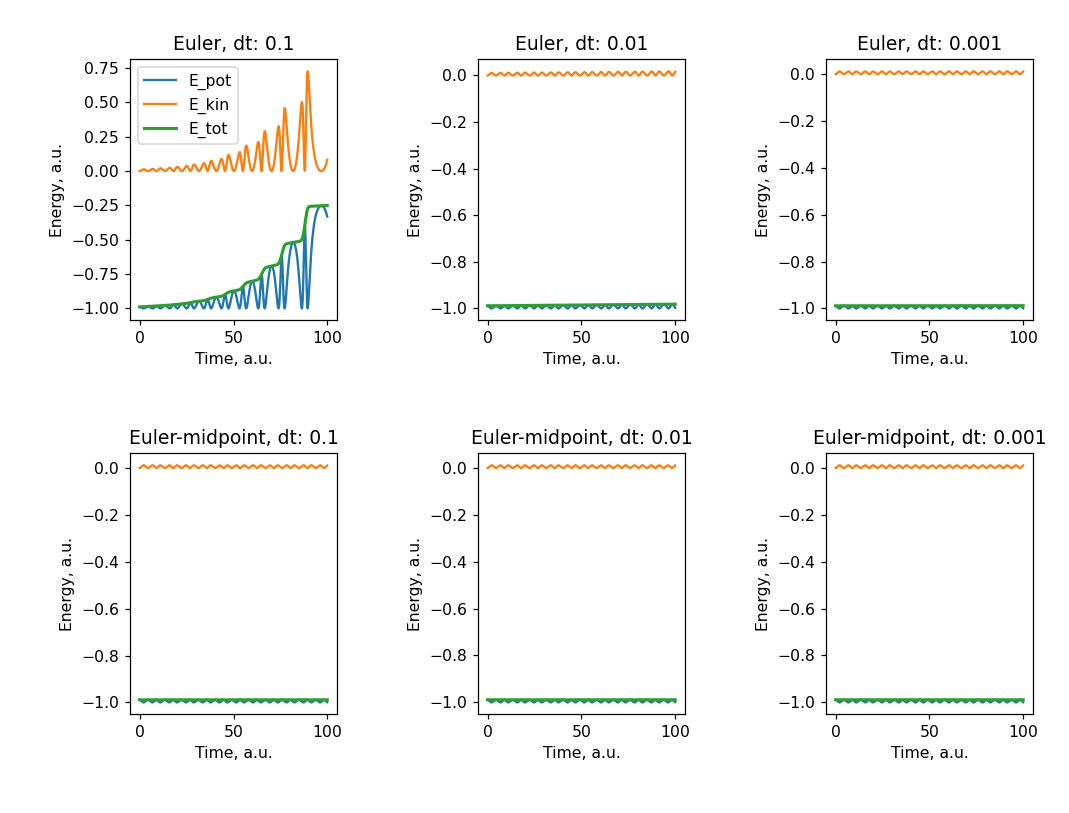

In [81]:
%matplotlib notebook
dts = [0.1, 0.01, 0.001]
for c, dt in enumerate(dts):
    plt.subplot(2,3,c+1)
    nsteps = int(100/dt)
    X, P, T, E_pot, E_kin, E_tot = md(x0, p0, q0, M, D, alpha, dt, nsteps, method='Euler')
    plt.plot(T, E_pot, label='E_pot')
    plt.plot(T, E_kin, label='E_kin')
    plt.plot(T, E_tot, label='E_tot', lw=2.0)
    plt.title(F'Euler, dt: {dt}')
    plt.ylabel('Energy, a.u.')
    plt.xlabel('Time, a.u.')

for dt in dts:
    c += 1
    plt.subplot(2,3,c+1)
    nsteps = int(100/dt)
    X, P, T, E_pot, E_kin, E_tot = md(x0, p0, q0, M, D, alpha, dt, nsteps, method='Euler-midpoint')
    plt.plot(T, E_pot, label='E_pot')
    plt.plot(T, E_kin, label='E_kin')
    plt.plot(T, E_tot, label='E_tot', lw=2.0)
    plt.title(F'Euler-midpoint, dt: {dt}')
    plt.ylabel('Energy, a.u.')
    plt.xlabel('Time, a.u.')
plt.subplot(2,3,1)
plt.legend()
plt.tight_layout()

## For the phase diagram

<IPython.core.display.Javascript object>


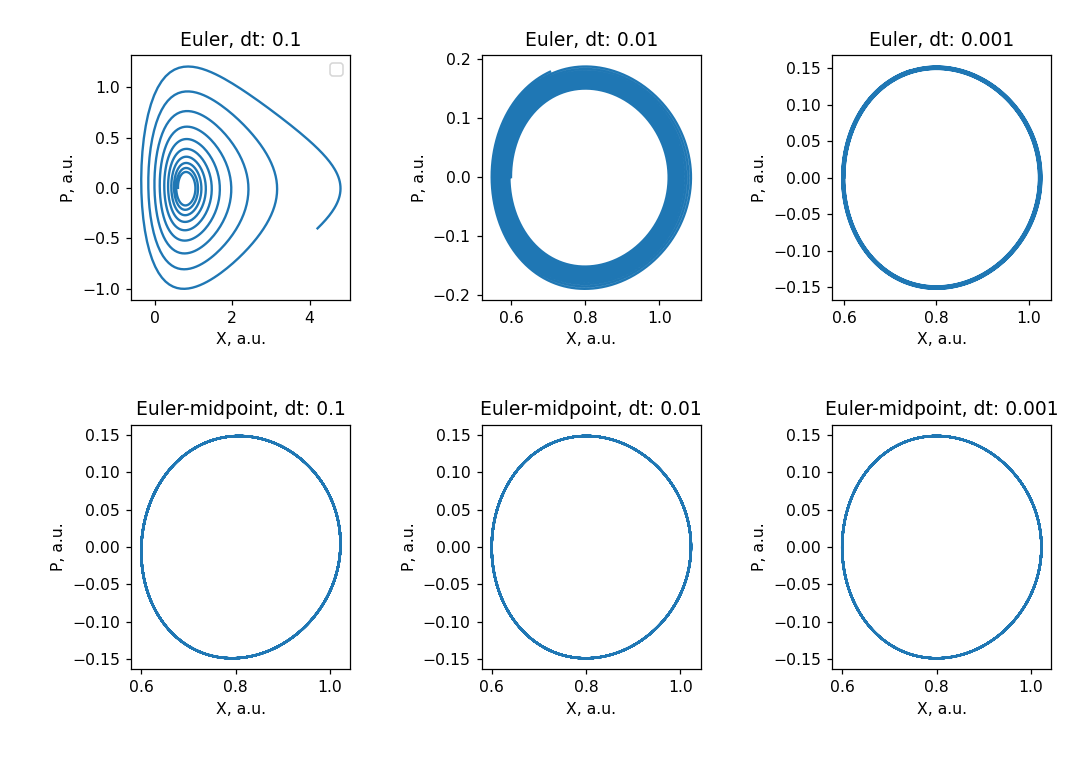

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [83]:
%matplotlib notebook
dts = [0.1, 0.01, 0.001]
for c, dt in enumerate(dts):
    plt.subplot(2,3,c+1)
    nsteps = int(100/dt)
    X, P, T, E_pot, E_kin, E_tot = md(x0, p0, q0, M, D, alpha, dt, nsteps, method='Euler')
    plt.plot(X, P)
    plt.title(F'Euler, dt: {dt}')
    plt.ylabel('P, a.u.')
    plt.xlabel('X, a.u.')

for dt in dts:
    c += 1
    plt.subplot(2,3,c+1)
    nsteps = int(100/dt)
    X, P, T, E_pot, E_kin, E_tot = md(x0, p0, q0, M, D, alpha, dt, nsteps, method='Euler-midpoint')
    plt.plot(X, P)
    plt.title(F'Euler-midpoint, dt: {dt}')
    plt.ylabel('P, a.u.')
    plt.xlabel('X, a.u.')
plt.subplot(2,3,1)
plt.legend()
plt.tight_layout()

## Part 3: Bound and unbounded dynamics

<IPython.core.display.Javascript object>


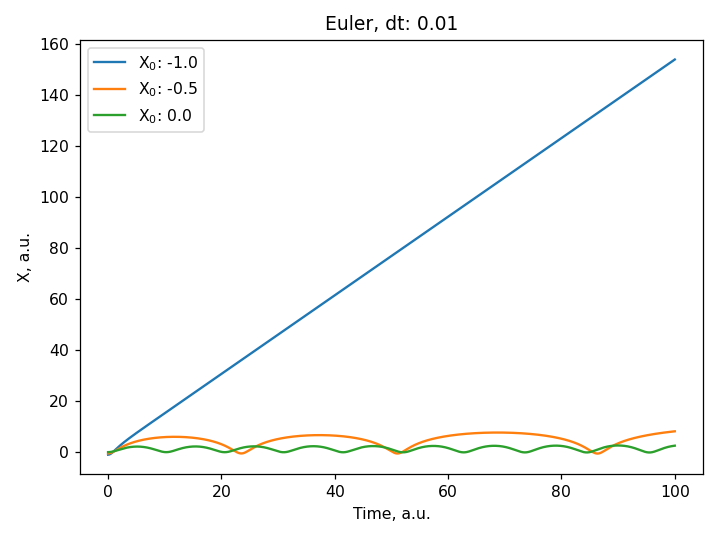

In [92]:
%matplotlib notebook
D = 1.0
alpha = 0.5
q0 = 0.8
p0 = 0.0
M = 1.0
dt = 0.01
nsteps = 10000
for x0 in [-1.0, -0.5, 0.0]:
    X, P, T, E_pot, E_kin, E_tot = md(x0, p0, q0, M, D, alpha, dt, nsteps, method='Euler')
    plt.plot(T, X, label=F'X$_0$: {x0}')
plt.title(F'Euler, dt: {dt}')
plt.ylabel('X, a.u.')
plt.xlabel('Time, a.u.')
plt.legend()
plt.tight_layout()

## Part 4: Verlet algorithm testing

The Verlet algorithm is implemented above and here we will be testing it using below parameters.

<IPython.core.display.Javascript object>


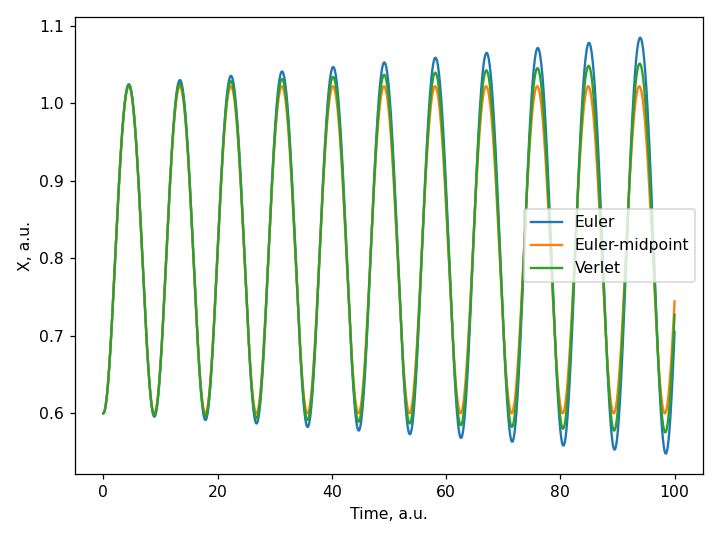

In [94]:
%matplotlib notebook
x0 = 0.6
for method in ['Euler', 'Euler-midpoint', 'Verlet']:
    X, P, T, E_pot, E_kin, E_tot = md(x0, p0, q0, M, D, alpha, dt, nsteps, method=method)
    plt.plot(T, X, label=method)
# print(X)
plt.ylabel('X, a.u.')
plt.xlabel('Time, a.u.')
plt.legend()
plt.tight_layout()